# Nearest Neighbor Classification - KNN and Conformal Prediction

* [Importing libraries](#Importing-libraries)
* [Loading Data](#Loading-Data)
* [Custom functions](#Custom-functions)
* [Prediction algorithm KNN](#Prediction-algorithm-KNN)
* [Running prediction for Iris](#Running-prediction-for-Iris)
* [Running prediction for Ionosphere](#Running-prediction-for-Ionosphere)
* [Choosing best K for Iris](#Choosing-best-K-for-Iris)
* [Choosing best K for Ionosphere](#Choosing-best-K-for-Ionosphere)
* [Conformal Prediction](#Conformal-Prediction)
* [Conformal Prediction Algorithm](#Conformal-Prediction-Algorithm)
* [Running Conformal Prediction for Iris ](#Running-Conformal-Prediction-for-Iris)
* [Running Conformal Prediction for Ionosphere ](#Running-Conformal-Prediction-for-Ionosphere)

## Importing libraries 

In [1]:
import sys
import time

import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Loading Data

In [2]:
iris_data = load_iris()
ionosphere_data = np.genfromtxt("ionosphere.txt", delimiter=',', names=True, dtype=None)

In [3]:
iris_data

iris_X = iris_data['data']
iris_y = iris_data['target']

In [4]:
ionosphere_data
list_data = [list(x) for x in ionosphere_data]
iono_X = []
iono_y = []
for i,d in enumerate(list_data):
    iono_X.append([x for j,x in enumerate(d) if j!=len(d)-1])
    iono_y.append([x for j,x in enumerate(d) if j==len(d)-1])

iono_X = np.array(iono_X)
iono_y = np.hstack(iono_y)
iono_y = np.where(iono_y == 1, 1, 0) #converting to 0 and 1 for simplicity


___The data consists of one duplicate value, which will result in `0` euclidean distance, which we will omit at that part___

In [5]:
str_X = [str(i) for i in iris_X]
str_X1 = [str(i) for i in iono_X]
print(len(str_X), len(str_X1))

print(len(set(str_X)), len(set(str_X1)))

150 350
149 349


##  Custom functions

In [6]:
def sort_it(list_to_sort):    
    try:
        for i in range(len(list_to_sort)):
            for j in range(len(list_to_sort) - 1):
                if list_to_sort[j] > list_to_sort[j+1]:
                    list_to_sort[j], list_to_sort[j + 1] = list_to_sort[j + 1], list_to_sort[j]
                
        return list_to_sort
    except:
        print(sys.exc_info())
        
def rank_it(array_list):
    array_len = len(array_list)
    rank_array = [0 for x in range(array_len)]
    
    array_meta = [(array_list[i], i) for i in range(array_len)]
    array_meta.sort(key = lambda x: x[0])
    
    eq_rank = 1
    a = 0
    rank = 1
    
    while a < array_len:
        b = a
        while b < array_len - 1 and array_meta[b][0] == array_meta[b + 1][0]: 
            b += 1
        eq_rank = (b - a) + 1
  
        for b in range(eq_rank): 
            item = array_meta[a+b][1] 
            rank_array[item] = (eq_rank - 1) + rank  
  
        rank += eq_rank 
        a += eq_rank
  
    return rank_array 

## Prediction algorithm KNN

In [7]:
def run_prediction(X, y, test_size=0.3, train_size=0.7, random_state=3006, k=1):
    
    if(test_size+train_size > 1 or test_size+train_size < 0):
        print("The sum of test_size and train_size should be between 0 and 1")
        return
    
    prediction = {"predicted_list" : [], "accuracy" : 0}
    
    try:
        # splitting test train data
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=random_state)

        predicted_list = []
    
        # training on X_train, y_train by calculating Euclidean distances
        for d in range(len(X_test)):
            eucl_distances = []
            for i in range(len(X_train)):
                #eucl_distances.append([np.sqrt(np.sum(np.power(X_test[d,:] - X_train[i,:], 2))), i])
                eucl_distances.append([np.linalg.norm(X_test[d,:] - X_train[i,:]), i]) #used linalg for faster calculation time
                
            eucl_distances = sort_it(eucl_distances)
            #print(eucl_distances)
    
            targets = [y_train[eucl_distances[i][1]] for i in range(k)]
            #print(targets)
        
            predicted_list.append(max(targets, key=targets.count))

        #print(predicted_list)
        prediction['predicted_list'] = predicted_list
        prediction['accuracy'] = np.mean(prediction['predicted_list'] == y_test)
        return prediction
    
    except:
        print(sys.exc_info())

### Running prediction for Iris

In [8]:
try :
    nn = run_prediction(iris_X, iris_y, test_size=0.3,train_size=0.7, random_state=3006, k=1)
    print(nn["accuracy"])
except:
    print(sys.exc_info()) 


0.9555555555555556


### Running prediction for Ionosphere

In [9]:
try :
    nn = run_prediction(iono_X, iono_y, test_size=0.3,train_size=0.7, random_state=3006, k=1)
    print(nn["accuracy"])
except:
    print(sys.exc_info()) 

0.9142857142857143


### Choosing best K for Iris

['0.96', '0.96', '0.96', '0.96', '0.98', '0.98', '1.00', '1.00', '1.00', '1.00', '1.00', '0.98', '0.98', '0.98', '1.00', '0.98', '1.00', '1.00', '1.00', '1.00', '1.00', '0.98', '0.98', '0.98']


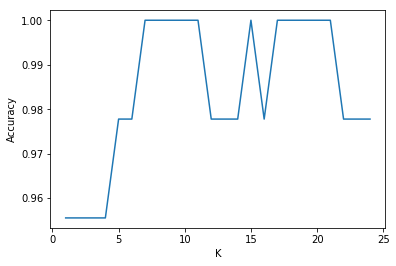

In [10]:
k_neighbors = list(range(1,25))
accuracy_scores = [run_prediction(iris_X, iris_y, test_size=0.3,train_size=0.7, random_state=3006, k=s)["accuracy"] for s in k_neighbors]
print(["{:.2f}".format(t) for t in accuracy_scores])

plt.plot(k_neighbors, accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

###  Choosing best K for Ionosphere

['0.91', '0.91', '0.87', '0.90', '0.87', '0.87', '0.85', '0.86', '0.86', '0.86', '0.86', '0.86', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87']


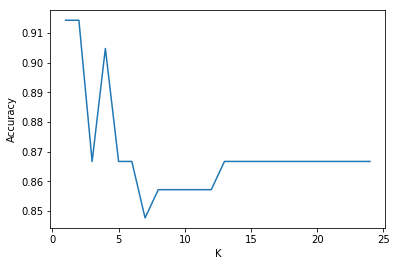

In [11]:
k_neighbors = list(range(1,25))
accuracy_scores = [run_prediction(iono_X, iono_y, test_size=0.3,train_size=0.7, random_state=3006, k=s)["accuracy"] for s in k_neighbors]
print(["{:.2f}".format(t) for t in accuracy_scores])

plt.plot(k_neighbors, accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

## Conformal Prediction Algorithm

In [12]:
def conformal_predictor(X, y, test_size=0.3, train_size=0.7, random_state=3006):
    if(test_size+train_size > 1 or test_size+train_size < 0):
        print("The sum of test_size and train_size should be between 0 and 1")
        return
    
    cf_prediction = { "p_values" : [], "predicted_list" : [], "false_p_value" : 0, "accuracy" : 0}
    
    try:
        predicted_list = []
        p_values = []
        
        # splitting test train data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=random_state)
        list_y_set = list(set(y_train))
        
        for i in range(len(X_test)):
            conformity_scores = [[] for j in range(len(list_y_set))]
            
            for idx_k, val_k in enumerate(list_y_set):
                extra_X_train = np.concatenate((X_train, [X_test[i]]), axis = 0)
                extra_y_train = np.concatenate((y_train, [val_k]), axis = 0) 
                
                for cur_idx, cur_elem in enumerate(extra_X_train):
                    y_list = [[] for j in range(len(list_y_set))]

                    excluded_list = list(extra_X_train)
                    del excluded_list[cur_idx]
                    excluded_y = list(extra_y_train)
                    del excluded_y[cur_idx]

                    for iter_index, iter_elem in enumerate(excluded_list): 
                        if(len(iter_elem) < 5): #this method works fast for lesser elements in an array
                            eucl_distance = math.sqrt(sum([(a - b)**2 for a, b in zip(cur_elem, iter_elem)]))
                        else: #used linalg for faster calculation time
                            eucl_distance = np.linalg.norm(cur_elem - iter_elem) 
                        
                        #eucl_distance = np.sqrt(np.sum(np.power(cur_elem - iter_elem, 2))) #traditional way
                        index_to_append = excluded_y[iter_index]
                
                        #we will get 0 euclidean distance because one duplicate element is present in both datasets
                        if(eucl_distance == 0): 
                            continue
                        if(len(y_list[index_to_append]) > 0):
                            if (eucl_distance < y_list[index_to_append][0]):
                                y_list[index_to_append][0] = (eucl_distance)
                        else:
                            y_list[index_to_append].append(eucl_distance) 
                
                    # conformity score calculation
                    same_class_distance = min([x for m,x in enumerate(y_list) if m == idx_k])[0]
                    different_class_distance = min([x for m,x in enumerate(y_list) if m != idx_k])[0]
                    conformity_scores[idx_k].append(different_class_distance/same_class_distance)

            # rank calculation
            p_vals = []
            for idx_k, val_k in enumerate(list_y_set):
                rank = rank_it(conformity_scores[idx_k])
                p_val = rank[len(rank)-1]/len(rank)
                p_vals.append(p_val)
            
            predicted_list.append(p_vals.index(max(p_vals)))
            p_values.append(p_vals)
        
        avg = []
        for i, p in enumerate(p_values):
            avg.extend([b for a,b in enumerate(p) if a != predicted_list[i]])
            
        avg_false_pval = sum(avg)/len(avg)
        cf_prediction["predicted_list"] = predicted_list
        cf_prediction["p_values"] = p_values
        cf_prediction["false_p_value"] = avg_false_pval
        cf_prediction["accuracy"] = np.mean(predicted_list == y_test)
        return cf_prediction
        
    except:
        print(sys.exc_info())
        

## Running Conformal Prediction for Iris 

* _The entire p values and predicted list can be found under dictionary `cf`_
* _The algorithm for iris dataset runs for about `6 seconds`_

In [13]:
start_time = time.time()
try :
    cf = conformal_predictor(iris_X, iris_y, test_size=0.3,train_size=0.7, random_state=3006)
    #print(cf)
    print("The average false p value : {} \nThe accuracy of prediction : {} \nThe test error rate is : {}".format(cf["false_p_value"], cf["accuracy"], 1-cf["accuracy"]))
except:
    print(sys.exc_info()) 
print("\nTime elapsed : %s seconds" % (time.time() - start_time))

The average false p value : 0.17735849056603772 
The accuracy of prediction : 0.9555555555555556 
The test error rate is : 0.0444444444444444

Time elapsed : 5.668936014175415 seconds


## Running Conformal Prediction for Ionosphere 

* _The entire p values and predicted list can be found under dictionary `cf`_
* _The algorithm for ionosphere dataset runs for about `50 seconds`_

In [ ]:
start_time = time.time()
try :
    cf = conformal_predictor(iono_X, iono_y, test_size=0.3,train_size=0.7, random_state=3006)
    #print(cf)
    print("The average false p value : {} \nThe accuracy of prediction : {} \nThe test error rate is : {}".format(cf["false_p_value"], cf["accuracy"], 1-cf["accuracy"]))
except:
    print(sys.exc_info()) 
print("\nTime elapsed : %s seconds" % (time.time() - start_time))

## Method chaining 

In [ ]:
def class knn_predictor(): # runs parallelly for multiple instances, makes less time complexity
    # self instance init
    # predicton, accuracy